In [25]:
import sys
sys.path.append("C:\\WorkingGround\\02450 Introduction to Machine Learning and Data Mining E17\\02450Toolbox_Python\Tools")
sys.path

['',
 '/home/user1/anaconda3/lib/python36.zip',
 '/home/user1/anaconda3/lib/python3.6',
 '/home/user1/anaconda3/lib/python3.6/lib-dynload',
 '/home/user1/anaconda3/lib/python3.6/site-packages',
 '/home/user1/anaconda3/lib/python3.6/site-packages/Sphinx-1.5.6-py3.6.egg',
 '/home/user1/anaconda3/lib/python3.6/site-packages/neurolab-0.3.5-py3.6.egg',
 '/home/user1/repos/gym',
 '/home/user1/anaconda3/lib/python3.6/site-packages/setuptools-27.2.0-py3.6.egg',
 '/home/user1/anaconda3/lib/python3.6/site-packages/IPython/extensions',
 '/home/user1/.ipython',
 'C:\\WorkingGround\\02450 Introduction to Machine Learning and Data Mining E17\\02450Toolbox_Python\\Tools',
 'C:\\WorkingGround\\02450 Introduction to Machine Learning and Data Mining E17\\02450Toolbox_Python\\Tools',
 'C:\\WorkingGround\\02450 Introduction to Machine Learning and Data Mining E17\\02450Toolbox_Python\\Tools',
 'C:\\WorkingGround\\02450 Introduction to Machine Learning and Data Mining E17\\02450Toolbox_Python\\Tools']

In [26]:
import sqlite3
import pandas as pd
from sklearn import tree
from sklearn import metrics
from sklearn.cross_validation import KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
from sklearn.mixture import GMM
from sklearn.mixture import GaussianMixture
from sklearn import model_selection
from sklearn import decomposition

from toolbox_02450 import clusterplot

from matplotlib.pyplot import figure, plot, legend, xlabel, show,annotate
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
%matplotlib inline

In [27]:
#data = np.loadtxt('dataset.csv', skiprows=1, delimiter=',')
df_match = pd.read_csv('dataset.csv')
print ("All columns ", df_match.columns.values)

All columns  ['stage' 'home_team_goal' 'away_team_goal' 'possession_home' 'B365H'
 'B365D' 'B365A' 'BWH' 'BWD' 'BWA' 'IWH' 'IWD' 'IWA' 'LBH' 'LBD' 'LBA'
 'WHH' 'WHD' 'WHA' 'VCH' 'VCD' 'VCA' 'buildUpPlaySpeed_home'
 'buildUpPlayDribbling_home' 'buildUpPlayPassing_home'
 'buildUpPlayPositioningClass_home_isOrganised'
 'chanceCreationPassing_home' 'chanceCreationCrossing_home'
 'chanceCreationShooting_home'
 'chanceCreationPositioningClass_home_isOrganised' 'defencePressure_home'
 'defenceAggression_home' 'defenceTeamWidth_home' 'buildUpPlaySpeed_away'
 'buildUpPlayDribbling_away' 'buildUpPlayPassing_away'
 'buildUpPlayPositioningClass_away_isOrganised'
 'chanceCreationPassing_away' 'chanceCreationCrossing_away'
 'chanceCreationShooting_away'
 'chanceCreationPositioningClass_away_isOrganised' 'defencePressure_away'
 'defenceAggression_away' 'defenceTeamWidth_away' 'corner_home'
 'corner_away' 'cross_home' 'cross_away' 'throwin_home' 'throwin_away'
 'shoton_home' 'shoton_away' 'shotoff_hom

In [28]:
home_wins = np.array((df_match['home_team_goal'] > df_match['away_team_goal']).tolist())
draws = np.array((df_match['home_team_goal'] == df_match['away_team_goal']).tolist())
match_results=list()
match_results_dict=dict()
for i ,match in enumerate(home_wins):
    if match:
        match_results.append(0)   ## home team win 
    elif draws[i]:
        match_results.append(1)   ## draw 
    else:
        match_results.append(2)  ## home team lose 

match_results_dict[0]='Home'
match_results_dict[1]='Draw'
match_results_dict[2]='Away'
df_match['Result']=match_results

In [29]:
in_match_features_list=['home_team_goal','away_team_goal','possession_home','corner_home',
                     'corner_away','cross_home','cross_away','throwin_home','throwin_away',
                     'shoton_home','shoton_away', 'shotoff_home', 'shotoff_away','foulcommit_home',
                     'foulcommit_away','ycard_home','ycard_away','rcard_home','rcard_away']

df_in_match=df_match[in_match_features_list]

In [30]:
X=df_match[in_match_features_list].as_matrix()

y=df_match['Result'].as_matrix()
print ("Using in game statistics to cluster match results ")

Using in game statistics to cluster match results 


### 1. Cluster Data by GMM and use cross-validation to estimate the number of components in the GMM. Interpret the extracted cluster centers

0.44


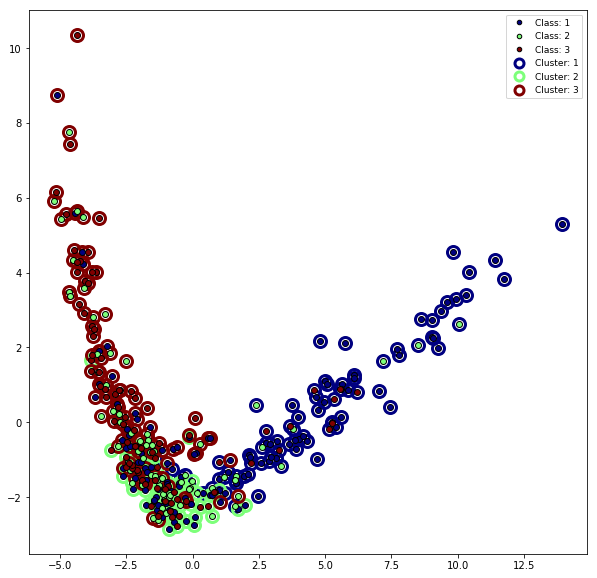

In [31]:
pregame_features = ['B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD',
                    'IWA', 'LBH', 'LBD', 'LBA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'buildUpPlaySpeed_home',
                    'buildUpPlayDribbling_home', 'buildUpPlayPassing_home',
                    'buildUpPlayPositioningClass_home_isOrganised', 'chanceCreationPassing_home',
                    'chanceCreationCrossing_home', 'chanceCreationShooting_home',
                    'chanceCreationPositioningClass_home_isOrganised', 'defencePressure_home', 
                    'defenceAggression_home', 'defenceTeamWidth_home', 'buildUpPlaySpeed_away',
                    'buildUpPlayDribbling_away', 'buildUpPlayPassing_away', 
                    'buildUpPlayPositioningClass_away_isOrganised', 'chanceCreationPassing_away',
                    'chanceCreationCrossing_away', 'chanceCreationShooting_away', 
                    'chanceCreationPositioningClass_away_isOrganised', 'defencePressure_away',
                    'defenceAggression_away', 'defenceTeamWidth_away']


postgame_features = ['possession_home', 'corner_home', 
                    'corner_away', 'cross_home', 'cross_away', 'throwin_home', 'throwin_away',
                    'shoton_home', 'shoton_away', 'shotoff_home', 'shotoff_away', 'foulcommit_home', 
                    'foulcommit_away', 'ycard_home', 'ycard_away', 'rcard_home', 'rcard_away']


pre_and_post = pregame_features + postgame_features

# win, draw, lose
match_results_dict = {0: 1, 1: 2, 2: 3}

X_hierarchical = df_match[pregame_features]
y_hierarchical = [match_results_dict[y[i]] for i in range(len(y))]
Xy_hierarchical = pd.concat(axis=1, objs=[X_hierarchical, pd.DataFrame(y_hierarchical)])
Xy_hierarchical.sort_values(axis=0, by=0, ascending=False)

Xy_hierarchical = Xy_hierarchical.sample(n=300)

X_hierarchical_orig = X_hierarchical
X_hierarchical = Xy_hierarchical.iloc[:, Xy_hierarchical.columns != 0]

X_hierarchical = (X_hierarchical - X_hierarchical.mean()) / X_hierarchical.std()

y_hierarchical = Xy_hierarchical[0]


# exercise 10.2.1
from matplotlib.pyplot import figure, show
from scipy.io import loadmat
from toolbox_02450 import clusterplot
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from scipy.spatial.distance import pdist

#X = mat_data['X']
#y = mat_data['y'].squeeze()
#attributeNames = [name[0] for name in mat_data['attributeNames'].squeeze()]
#classNames = [name[0][0] for name in mat_data['classNames']]
#N, M = X.shape
#C = len(classNames)

# df_match['home_team_goal'] >  df_match['away_team_goal']


# ‘braycurtis’, ‘canberra’, ‘chebyshev’, ‘cityblock’, ‘correlation’, ‘cosine’, ‘dice’,
#‘euclidean’, ‘hamming’, ‘jaccard’, ‘kulsinski’, ‘mahalanobis’, ‘matching’, ‘minkowski’,
#‘rogerstanimoto’, ‘russellrao’, ‘seuclidean’, ‘sokalmichener’, ‘sokalsneath’, ‘sqeuclidean’, ‘yule’
Z = linkage(pdist(X_hierarchical, 'cosine'), method='complete')
cls = fcluster(Z, criterion='maxclust', t=3)
figure(1, figsize=(10,10))


pca_hierarchical = decomposition.PCA(n_components=2)
pca_hierarchical.fit(X_hierarchical)
X_pca = pca_hierarchical.transform(X_hierarchical)

#plt.scatter(X_pca[:,0], X_pca[:,1])

clusterplot(X_pca, cls.reshape(cls.shape[0],1), y=y_hierarchical)



print(sum(cls == y_hierarchical) / 300)

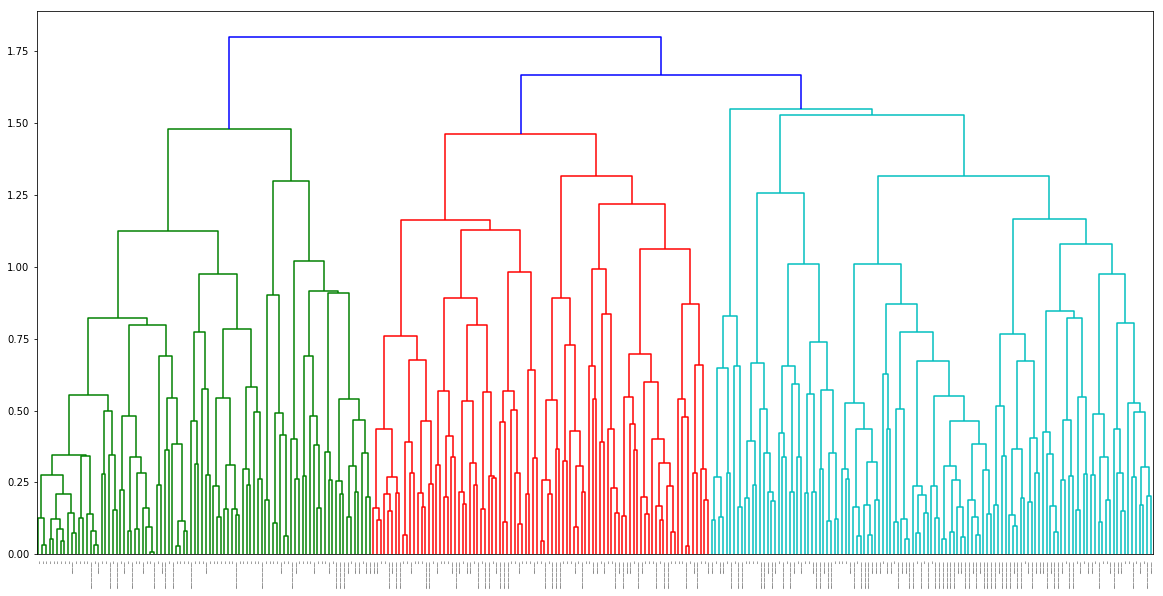

In [32]:
match_results_dict = {1: '_', 2: '_____', 3: '___________'}

y_dendro = [match_results_dict[y_hierarchical.iloc[i]] for i in range(y_hierarchical.shape[0])]

figure(2, figsize=(20,10))
#labs = ['Home', 'Home', 'Away','Home','Draw','Draw','Home','Draw','Draw','Away','Home','Draw','Draw','Draw','Home','Away','Home','Draw','Draw','Away']
labs = y_dendro


dendrogram(Z, truncate_mode='level', p=300, labels=labs, show_leaf_counts=True, color_threshold=1.6)
show()